In [1]:
import datasets
import torch
import numpy as np
import json

## Get negation indices

In [2]:
mnli = datasets.load_dataset("glue", "mnli")

Reusing dataset glue (/home/meissner/.cache/huggingface/datasets/glue/mnli/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


  0%|          | 0/5 [00:00<?, ?it/s]

In [3]:
negation_words = ["no", "not", "don't", "none", "nothing", 
                  "never", "aren’t", "isn’t", "weren’t", 
                  "neither", "don’t", "didn’t", "doesn’t", 
                  "cannot", "hasn’t", "won’t"]

In [4]:
def find_negation_idxs(dataset):
    ent_indices, cont_indices = [], []
    for sample in dataset:
        if any([word in sample["hypothesis"].lower() for word in negation_words]):
            if sample['label'] == 0:
                ent_indices.append(sample['idx'])
            elif sample['label'] == 2:
                cont_indices.append(sample['idx'])
    return ent_indices, cont_indices

In [5]:
train_ents, train_conts = find_negation_idxs(mnli["train"])
val_m_ents, val_m_conts = find_negation_idxs(mnli["validation_matched"])
val_mm_ents, val_mm_conts = find_negation_idxs(mnli["validation_mismatched"])

In [7]:
all_indices = {"train_ents" : train_ents, "train_conts" : train_conts, "val_m_ents" : val_m_ents, "val_m_conts" : val_m_conts, "val_mm_ents" : val_mm_ents, "val_mm_conts" : val_mm_conts}

In [7]:
!mkdir /home/meissner/shortcut-pruning/data/subsets/

mkdir: cannot create directory ‘/home/meissner/shortcut-pruning/data/subsets/’: File exists


In [8]:
with open("/home/meissner/shortcut-pruning/data/subsets/mnli_negation_indices.json", "w") as _file:
    _file.write(json.dumps(all_indices))

In [10]:
for key, value in all_indices.items():
    print(key)
    print(len(value))

train_ents
22429
train_conts
50008
val_m_ents
602
val_m_conts
1203
val_mm_ents
576
val_mm_conts
1346


## Get lexically similar words

In [21]:
import nltk
import string
from nltk.tokenize import word_tokenize

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/meissner/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
puncts = set(string.punctuation)
print(puncts)

{'/', '{', '=', '$', '-', "'", ')', '*', '&', ',', '.', '\\', '%', '<', '"', '^', '?', '_', '(', '!', '|', '~', ':', '[', '@', '}', '#', '+', '>', ';', '`', ']'}


In [12]:
def jaccard_similarity(set1, set2):
    return float(len(set1.intersection(set2)) / len(set1.union(set2)))

In [19]:
word_tokenize(mnli['validation_matched'][23]['hypothesis'])

['Leading',
 'organizations',
 'want',
 'to',
 'be',
 'sure',
 'their',
 'employees',
 'are',
 'safe',
 '.']

In [64]:
jaccards = []
for sample in mnli['train']:
    hyposet = set(word_tokenize(sample['hypothesis'].lower())) - puncts
    premset = set(word_tokenize(sample['premise'].lower())) - puncts
    jaccards.append(jaccard_similarity(hyposet, premset))
jaccards = np.array(jaccards)

In [65]:
np.min(jaccards), np.mean(jaccards), np.max(jaccards), np.argmax(jaccards), np.argmin(jaccards)

(0.0, 0.2427596034733135, 1.0, 115, 8)

In [38]:
mnli['validation_matched']['label']

[1,
 2,
 0,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 0,
 1,
 0,
 0,
 0,
 1,
 2,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 0,
 0,
 2,
 0,
 0,
 1,
 1,
 0,
 0,
 2,
 1,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 1,
 2,
 1,
 0,
 2,
 2,
 1,
 1,
 0,
 1,
 2,
 2,
 1,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 1,
 0,
 1,
 2,
 2,
 0,
 0,
 1,
 2,
 1,
 2,
 0,
 1,
 0,
 0,
 1,
 1,
 2,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 1,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 0,
 1,
 1,
 2,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 1,
 2,
 0,
 2,
 1,
 1,
 1,
 2,
 0,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 0,
 1,
 0,
 2,
 2,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 1,
 2,
 1,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 1,
 1,
 0,
 2,
 0,
 1,
 0,
 2,
 2,
 0,
 2,
 1,
 1,
 2,
 0,
 2,
 0,
 1,
 2,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 2,
 0,
 2,
 1,
 0,
 2,
 1,
 1,
 0,
 2,
 1,
 2,
 1,
 2,
 0,


In [42]:
labels == 2

array([False,  True, False, ..., False, False,  True])

In [33]:
from matplotlib import pyplot as plt

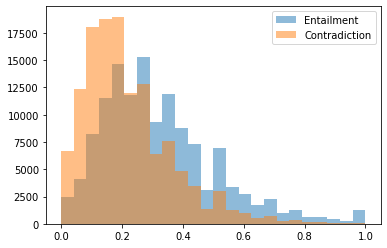

In [66]:
bins = np.linspace(0.0, 1.0, 25)
labels = np.array(mnli['train']['label'])
ent_jaccards = jaccards[labels == 0]
cont_jaccards = jaccards[labels == 2]
plt.hist(ent_jaccards, bins, alpha=0.5, label="Entailment")
plt.hist(cont_jaccards, bins, alpha=0.5, label="Contradiction")
plt.legend()
plt.show()

In [79]:
top_indices = np.argsort(jaccards)[-4000:]

In [80]:
jaccards[top_indices[0]] # Cut rate

0.7857142857142857

In [76]:
np.mean(labels[top_indices] == 0) # 

0.8825

In [90]:
def find_high_lex_overlap_idxs(dataset, count_lim=400):
    jaccards = []
    labels = np.array(dataset['label'])
    for sample in dataset:
        hyposet = set(word_tokenize(sample['hypothesis'].lower())) - puncts
        premset = set(word_tokenize(sample['premise'].lower())) - puncts
        jaccards.append(jaccard_similarity(hyposet, premset))
    jaccards = np.array(jaccards)
    top_indices = np.argsort(jaccards)[-count_lim:]
    ent_indices = top_indices[labels[top_indices] == 0]
    cont_indices = top_indices[labels[top_indices] == 2]
    return ent_indices, cont_indices

In [91]:
train_ents, train_conts = find_high_lex_overlap_idxs(mnli["train"], count_lim=4000)
val_m_ents, val_m_conts = find_high_lex_overlap_idxs(mnli["validation_matched"], count_lim=200)
val_mm_ents, val_mm_conts = find_high_lex_overlap_idxs(mnli["validation_mismatched"], count_lim=200)

In [88]:
val_m_ents[0]

8901

In [96]:
mnli['validation_matched'][int(val_m_ents[0])], mnli['validation_matched'][int(val_m_conts[0])]

({'premise': 'Shoot only the ones that face us, Jon had told Adrin.',
  'hypothesis': 'Jon instructed Adrin to only shoot the ones that face us.',
  'label': 0,
  'idx': 3262},
 {'premise': 'The rain had stopped, but the green glow painted everything around them.',
  'hypothesis': 'The red glow painted everything around them after the rain had stopped.',
  'label': 2,
  'idx': 8901})

In [100]:
all_indices = {"train_ents" : list(train_ents), "train_conts" : list(train_conts), "val_m_ents" : list(val_m_ents), "val_m_conts" : list(val_m_conts), "val_mm_ents" : list(val_mm_ents), "val_mm_conts" : list(val_mm_conts)}

In [101]:
for key, value in all_indices.items():
    print(key)
    print(len(value))

train_ents
3179
train_conts
504
val_m_ents
144
val_m_conts
36
val_mm_ents
144
val_mm_conts
28


In [104]:
type(all_indices['val_m_ents'][0])

numpy.int64

In [105]:
import numpy
import json

class MyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, numpy.integer):
            return int(obj)
        elif isinstance(obj, numpy.floating):
            return float(obj)
        elif isinstance(obj, numpy.ndarray):
            return obj.tolist()
        else:
            return super(MyEncoder, self).default(obj)

In [106]:
with open("/home/meissner/shortcut-pruning/data/subsets/mnli_lex_overlap_indices.json", "w") as _file:
    _file.write(json.dumps(all_indices, cls=MyEncoder))